# RandomForestRegressor with the Blue Book for Bulldozers

We will be looking at the Blue Book for Bulldozers Kaggle Competition: "The goal of the contest is to predict the sale price of a particular piece of heavy equiment at auction based on it's usage, equipment type, and configuration. The data is sourced from auction result postings and includes information on usage and equipment configurations."
This is a very common type of dataset and prediciton problem, and similar to what you may see in your project or workplace.

https://www.kaggle.com/c/bluebook-for-bulldozers

Using a Random Forest Regressor from the sklearn library and the fastai library, we will predict the price.

#### Initialisation

In [192]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [193]:
from fastai.imports import *
from fastai.structured import *

from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display

from sklearn import datasets, linear_model
from sklearn import metrics

### The data

Set the path to the folder containing the data set

In [3]:
Mac = "yes"

In [19]:
if Mac == "yes":
    PATH = "/Users/mortenjensen/fastai/data/bulldozer/above100mb/"
else:
    PATH = "/home/ubuntu/fastai/data/bulldozer/"
    

Using pandas the .csv file is read to a dataframe. Columns containing dates should be included in "parse_dates="

In [21]:
df_raw = pd.read_csv(f'{PATH}Train.csv', low_memory=False, 
                     parse_dates=["saledate"])

The bull book data set contains 401125 rows of observations and 53-1 features.

In [22]:
df_raw.shape

(401125, 53)

To inspect the dateframe, we define a function to display a maximum of 1000 elements in each direction:

In [23]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

#### Display the dataframe

In [24]:
display_all(df_raw.head())

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,521D,521,D,NaN,NaN,NaN,Wheel Loader - 110.0 to 120.0 Horsepower,Alabama,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,950FII,950,F,II,NaN,Medium,Wheel Loader - 150.0 to 175.0 Horsepower,North Carolina,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,23.5,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,226,226,NaN,NaN,NaN,NaN,Skid Steer Loader - 1351.0 to 1601.0 Lb Operat...,New York,SSL,Skid Steer Loaders,NaN,OROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,PC120-6E,PC120,NaN,-6E,NaN,Small,"Hydraulic Excavator, Track - 12.0 to 14.0 Metr...",Texas,TEX,Track Excavators,NaN,EROPS w AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,S175,S175,NaN,NaN,NaN,NaN,Skid Steer Loader - 1601.0 to 1751.0 Lb Operat...,New York,SSL,Skid Steer Loaders,NaN,EROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
display_all(df_raw.describe(include='all'))

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
count,4.011250e+05,401125.000000,4.011250e+05,401125.000000,401125.000000,380989.000000,401125.000000,1.427650e+05,69639,401125,401125,401125,263934,56908,71919,190350,401125,401125,401125,401125,104361,400800,192077,79134,148606,79134,183230,79134,25219,25219,25219,25219,320570,25219,104137,25230,25219,94718,213952,43458,43362,43362,99153,99872,99218,99288,99218,99153,78672,79833,79834,69411,69369
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,3919,4999,1950,175,122,139,6,74,53,6,6,4,6,2,4,3,2,8,2,2,6,3,2,12,2,4,2,3,17,3,2,2,3,2,19,29,3,3,3,2,10,7,4,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Medium,2009-02-16 00:00:00,310G,580,C,II,L,Medium,Backhoe Loader - 14.0 to 15.0 Ft Standard Digg...,Florida,TEX,Track Excavators,Two Wheel Drive,OROPS,None or Unspecified,None or Unspecified,No,Standard,Standard,None or Unspecified,None or Unspecified,14',None or Unspecified,No,2 Valve,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Standard,Steel,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,None or Unspecified,PAT,None or Unspecified,Standard,Conventional
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33985,1932,5039,19798,43235,13202,15875,62274,56166,63944,101167,101167,46139,173932,178300,70614,77685,48829,140328,75211,24692,9615,21923,23937,141404,19463,83452,12719,16207,46339,184582,40430,40515,42784,84880,79651,78820,83093,90255,84653,78652,38612,69923,68073,68679
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1989-01-17 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-12-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.919713e+06,31099.712848,1.217903e+06,6889.702980,134.665810,6.556040,1899.156901,3.457955e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,9.090215e+05,23036.898502,4.409920e+05,6221.777842,8.962237,16.976779,291.797469,2.759026e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.139246e+06,4750.000000,0.000000e+00,28.000000,121.000000,0.000000,1000.000000,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1.418371e+06,14500.000000,1.088697e+06,3259.000000,132.000000,1.000000,1985.000000,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
df_raw.dtypes

SalesID                              int64
SalePrice                            int64
MachineID                            int64
ModelID                              int64
datasource                           int64
auctioneerID                       float64
YearMade                             int64
MachineHoursCurrentMeter           float64
UsageBand                           object
saledate                    datetime64[ns]
fiModelDesc                         object
fiBaseModel                         object
fiSecondaryDesc                     object
fiModelSeries                       object
fiModelDescriptor                   object
ProductSize                         object
fiProductClassDesc                  object
state                               object
ProductGroup                        object
ProductGroupDesc                    object
Drive_System                        object
Enclosure                           object
Forks                               object
Pad_Type   

### Data Processing

The blue book Bulldozer competition specify the predictions should be evaluated by RMSLE (root mean squared log error) between the actual and predicted auction prices. Therefore we take the log of the prices, so that RMSE (root mean squared error) will give us what we need. You could do this step later as well.

In [27]:
df_raw.SalePrice = np.log(df_raw.SalePrice)

##### Date column

Regarding the saledate, you should always consider a feature extraction step. Without expanding your date-time into these additional fields, you can't capture any trend/cyclical behavior as a function of time at any of these granularities. Thease trend/cyclical behavior could be week number, quater, holidays and so on. 

The following method extracts particular date fields from a complete datetime for the purpose of constructing categoricals. 

In [28]:
add_datepart(df_raw, 'saledate')
display_all(df_raw.head())

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleWeek,saleDay,saleDayofweek,saleDayofyear,saleIs_month_end,saleIs_month_start,saleIs_quarter_end,saleIs_quarter_start,saleIs_year_end,saleIs_year_start,saleElapsed
0,1139246,11.097410,999089,3157,121,3.0,2004,68.0,Low,521D,521,D,NaN,NaN,NaN,Wheel Loader - 110.0 to 120.0 Horsepower,Alabama,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,2006,11,46,16,3,320,False,False,False,False,False,False,1163635200
1,1139248,10.950807,117657,77,121,3.0,1996,4640.0,Low,950FII,950,F,II,NaN,Medium,Wheel Loader - 150.0 to 175.0 Horsepower,North Carolina,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,23.5,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,2004,3,13,26,4,86,False,False,False,False,False,False,1080259200
2,1139249,9.210340,434808,7009,121,3.0,2001,2838.0,High,226,226,NaN,NaN,NaN,NaN,Skid Steer Loader - 1351.0 to 1601.0 Lb Operat...,New York,SSL,Skid Steer Loaders,NaN,OROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004,2,9,26,3,57,False,False,False,False,False,False,1077753600
3,1139251,10.558414,1026470,332,121,3.0,2001,3486.0,High,PC120-6E,PC120,NaN,-6E,NaN,Small,"Hydraulic Excavator, Track - 12.0 to 14.0 Metr...",Texas,TEX,Track Excavators,NaN,EROPS w AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011,5,20,19,3,139,False,False,False,False,False,False,1305763200
4,1139253,9.305651,1057373,17311,121,3.0,2007,722.0,Medium,S175,S175,NaN,NaN,NaN,NaN,Skid Steer Loader - 1601.0 to 1751.0 Lb Operat...,New York,SSL,Skid Steer Loaders,NaN,EROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009,7,30,23,3,204,False,False,False,False,False,False,1248307200


Notice that the SaleDate column have been expanded into 12 new featues [saleYear, saleMonth,...sales_year_start] 

However, the add_datepart command from fastai, won't give you information on trend/cyclical behavior such as superbowl, sunny day, rain day and so on you have to know your domain for this!. 

##### Input to the randomforestregressor -  =! Strings

Before running the RandomForestRegressor we need to transform some of our features. The reason:

The RandomForestRegressor code is written as: 

`m = RandomForestRegressor(n_jobs=-1)`

`m.fit(features), target)`

The first line sets the parameters controlling the RandomForestRegressor, here `n_jobs=-1` means using all processors for parallelized computing. Another parameter could be n_estimators, which specify the number of trees in the forest.

The second line builds the forest of trees from the training set and features fit(Features, Target). The training input samples. Internally, its dtype will be converted to `dtype=np.float3`
. Therefore, it is important to transform stings in the dateframe to categories, which can be converted to np.float32, in contrast to strings. 

The categorical variables are currently stored as strings, which is inefficient, and doesn't provide the numeric coding required for a random forest. Therefore we call `train_cats` from Fastai to convert strings to pandas categories.

In [29]:
train_cats(df_raw)

Show colums changed to category

In [30]:
display_all(df_raw.dtypes)

SalesID                        int64
SalePrice                    float64
MachineID                      int64
ModelID                        int64
datasource                     int64
auctioneerID                 float64
YearMade                       int64
MachineHoursCurrentMeter     float64
UsageBand                   category
fiModelDesc                 category
fiBaseModel                 category
fiSecondaryDesc             category
fiModelSeries               category
fiModelDescriptor           category
ProductSize                 category
fiProductClassDesc          category
state                       category
ProductGroup                category
ProductGroupDesc            category
Drive_System                category
Enclosure                   category
Forks                       category
Pad_Type                    category
Ride_Control                category
Stick                       category
Transmission                category
Turbocharged                category
B

Focusing on the column with UsageBand, we can see that it contains three categories:

In [31]:
df_raw.UsageBand.cat.categories

Index(['High', 'Low', 'Medium'], dtype='object')

Optionally one can change the order of the categories, however it it not neassary for the randomforestregressor algorithm.

In [32]:
df_raw.UsageBand.cat.set_categories(['High', 'Medium', 'Low'], ordered=True, inplace=True)
df_raw.UsageBand.cat.categories

Index(['High', 'Medium', 'Low'], dtype='object')

Normally, pandas will continue displaying the text categories, while treating them as numerical data internally. Optionally, we can replace the text categories with numbers, which will make this variable non-categorical, like so:.

In [33]:
df_raw.Hydraulics = df_raw.Hydraulics.cat.codes
df_raw.Hydraulics.head()

0    0
1    0
2    3
3    0
4    3
Name: Hydraulics, dtype: int8

##### Missing values 

We're still not quite done - for instance we have lots of missing values, which we can't pass directly to a random forest. 

We can show the procentage of missing values in each column by:

In [34]:
display_all(df_raw.isnull().sum().sort_index()/len(df_raw))

Backhoe_Mounting            0.803872
Blade_Extension             0.937129
Blade_Type                  0.800977
Blade_Width                 0.937129
Coupler                     0.466620
Coupler_System              0.891660
Differential_Type           0.826959
Drive_System                0.739829
Enclosure                   0.000810
Enclosure_Type              0.937129
Engine_Horsepower           0.937129
Forks                       0.521154
Grouser_Tracks              0.891899
Grouser_Type                0.752813
Hydraulics                  0.000000
Hydraulics_Flow             0.891899
MachineHoursCurrentMeter    0.644089
MachineID                   0.000000
ModelID                     0.000000
Pad_Type                    0.802720
Pattern_Changer             0.752651
ProductGroup                0.000000
ProductGroupDesc            0.000000
ProductSize                 0.525460
Pushblock                   0.937129
Ride_Control                0.629527
Ripper                      0.740388
S

To handle the missing values the `proc_df` code from fastai is used. The `proc_df` not only handles missing values, it also replace categories with their numeric codes and split the dependent variable into a separate variable (split features and target values).

For each column of the dataframe which is not in skip_flds nor in ignore_flds, NaN values are replaced by the median value of the column. 

skip_flds: A list of fields that dropped from df.
ignore_flds: A list of fields that are ignored during processing.

###### Save point for df_raw before running Proc_df

In [35]:
os.makedirs('tmp', exist_ok=True)
df_raw.to_feather('tmp/bulldozers-raw')

In [8]:
cd fastai

/Users/mortenjensen/fastai


In [9]:
df_raw = pd.read_feather('tmp/bulldozers-raw')

##### Run proc_df continued from before save point. 

In [10]:
df, y, nas = proc_df(df_raw, 'SalePrice')

## RandomForestRegressor

Now we have a dataframe with features and target values ready for the RandomForestRegressor

##### Validation set

Just because a learning algorithm fits a training set well, that does not mean it is a good hypothesis. It could over fit and as a result your predictions on the test set would be poor. 


![Image of fittings](https://i.stack.imgur.com/t0zit.png)

The error of your hypothesis as measured on the data set with which you trained the parameters will be lower than the error on any other data set.

Given many models with different polynomial degrees, we can use a systematic approach to identify the 'best' function. In order to choose the model of your hypothesis, you can test each degree of polynomial and look at the error result.

One way to break down our dataset into the three sets is:

Training set: 60%
Cross validation set: 20%
Test set: 20%
We can now calculate three separate error values for the three different sets using the following method:

1. Optimize the parameters in Θ using the training set for each polynomial degree.
2. Find the polynomial degree d with the least error using the cross validation set.
3. Estimate the generalization error using the test set


Kaggle's Blue book bulldozers competition already supply us with a vaildation and test set. However, for practice we will spilt the dataframe into a training and validation set. 

In [11]:
def split_vals(a,n): return a[:n].copy(), a[n:].copy()

n_valid = 12000  # same as Kaggle's test set size
n_trn = len(df)-n_valid
raw_train, raw_valid = split_vals(df_raw, n_trn)
X_train, X_valid = split_vals(df, n_trn)
y_train, y_valid = split_vals(y, n_trn)

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((389125, 66), (389125,), (12000, 66), (12000,))

`Notice` that since we are dealing a data set that has a time/date column, we use the latest oberservations to our validation set. 

Use your domain knowledge to chooses the right subset for validation and testing. It might be a random subset!

Next we define a function to first calcualte the roor mean squard error:

In [12]:
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

In [80]:
def meanse(x,y): return ((x-y)**2).mean()

Define function to display results of training and validation errors.  

In [264]:
def print_score(m):
    res = ['Train RMSLE ={:05f}'.format(rmse(m.predict(X_train), y_train)), 'Vaild RMSLE={:05f}'.format(rmse(m.predict(X_valid), y_valid)),
            'Train R squared = {:05f}'.format(m.score(X_train, y_train)), 'Vaild R squared = {:05f}'.format(m.score(X_valid, y_valid))]
    if hasattr(m, 'oob_score_'): (res.append('OOB Score = {:05f}'.format(m.oob_score_))) 
    print(res)

### Speeding things up!

#### 1. method - Subset

First we use proc_df to divide our dataframe in features and target values. Furthermore we add the subset parameter which choose a random subset of size from df.

In [205]:
df_trn, y_trn, nas = proc_df(df_raw, 'SalePrice', subset=30000, na_dict=nas)
X_train, _ = split_vals(df_trn, 20000)
y_train, _ = split_vals(y_trn, 20000)

In [206]:
m = RandomForestRegressor(n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 35.3 s, sys: 264 ms, total: 35.6 s
Wall time: 10.9 s
['Train RMSLE =0.093972', 'Vaild RMSLE=0.345154', 'Train R squared = 0.980535', 'Vaild R squared = 0.787248']


## Random forest regressor explained

We are going to build a single tree. In scikit-learn, they do not call them trees but estimators.

Parameters:
- `n_estimators=` — create a forest with just one tree
- `max_depth=` — to make it a small tree
- `bootstrap=Fals`? — random forest randomizes bunch of things, we want to turn that off by this parameter

In [207]:
m = RandomForestRegressor(n_estimators=1, max_depth=3, bootstrap=False, n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

['Train RMSLE =0.518780', 'Vaild RMSLE=0.582665', 'Train R squared = 0.406769', 'Vaild R squared = 0.393703']


This small deterministic tree has R^2 of 0.39 after fitting so this is not a good model but better than the mean model since it is greater than 1 and we can actually draw the three

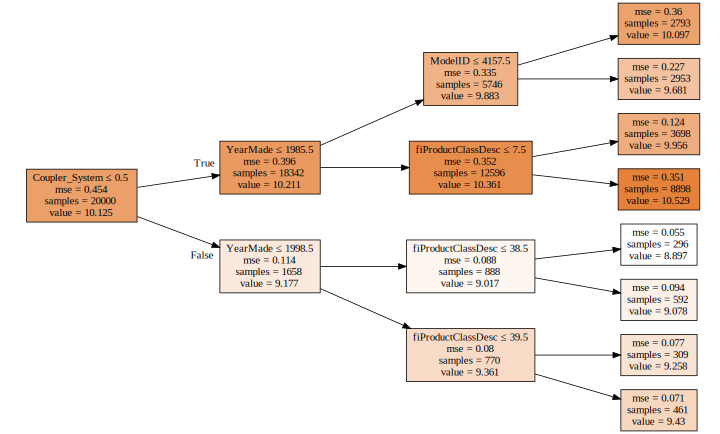

In [208]:
draw_tree(m.estimators_[0], df_trn, precision=3)

A tree consists of a sequence of binary decisions.

When building a random forest from scratch. 


- We want to pick a feature and it's threshold to select the best single binary spilt we can make. 
- The best single binary spilt we can make is determine by the weighted average of the mean squared errors over the new nodes(Ture/False).

Conclusion: We simply try every feature and every threshold of that feature to see which feature and which value that will give us the spilt with the best possiable weighted average of the nodes.  


Regrading the tree above: 
- The first line indicates the binary split criteria
- `sample` at the root is 20,000 since that is what we specified when splitting the data. 
- `value` is aveage of the log of price, and if we built a model where we just used the average all the time, then the mean squared error mse would be 0.445
- The best single binary split we can make turns out to be `Coupler_system ≤ 0.5` which will improve mse to `0.115` in false path and `0.397` in true path
- Darker color indicates higher value


The average log(remember we took the "log" previous) price in first node:

In [234]:
value_mean = np.mean(y_train), print(value_mean)

(10.125277001188609, None)


Mean squard error calculation in the first node:

In [235]:
y_pred_line=np.ones(y_train.shape[0])

In [236]:
y_pred_line[:]= value_mean[0]

In [233]:
print('Mean squared error: %.3f'
      % metrics.mean_squared_error(y_train, y_pred_line))

Mean squared error: 0.454


This is the entirety of creating a decision tree. Stopping condition:

- When you hit the limit that was requested (max_depth)
- When your leaf nodes only have one thing in them

##### Let’s make our decision tree better 

As of now, we have specified the `max_depth = 3`, by removing the max_dept parameter the single tree can grow bigger

In [237]:
m = RandomForestRegressor(n_estimators=1, bootstrap=False, n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

['Train RMSLE =0.000000', 'Vaild RMSLE=0.481174', 'Train R squared = 1.000000', 'Vaild R squared = 0.586522']


By doing so, the training R^2 becomes 1 because with no max depth the single tree regressor can keep splitting the features until every leafnode only have one thing in it. Hence, it overfit.

However, the validation R² is 0.73 — which is better than the shallow tree but not as good as we would like.( Overfitting!! )

This is why we need to use bagging of multiple trees to get more generalizable results.

##### Creating the forest - Statistical technique called bagging

So what is bagging? Bagging is an interesting idea which is what if we created five different models each of which was only somewhat predictive but the models gave predictions that were not correlated with each other. That would mean that the five models would have profound different insights into the relationships in the data. If you took the average of those five models, you are effectively bringing in the insights from each of them. So this idea of averaging models is a technique for Ensembling.

What if we created a whole a lot of trees — big, deep, massively overfit trees but each one, let’s say, we only pick a random 1/10 of the data. Let’s say we do that a hundred times (different random sample every time). They are overfitting terribly but since they are all using different random samples, they all overfit in different ways on different things. In other words, they all have errors but the errors are random. The average of a bunch of random errors is zero. If we take the average of these trees each of which have been trained on a different random subset, the error will average out to zero and what is left is the true relationship — and that’s the random forest.

The key insight here is to construct multiple models which are better than nothing and where the errors are, as much as possible, not correlated with each other.

Below we will create a forest of 10 trees and specify `bootstrap=True`(default) to choose a random subset of the data (uncorrelated) 

In [247]:
m = RandomForestRegressor(n_estimators=10, bootstrap=True,n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 3.3 s, sys: 38.7 ms, total: 3.34 s
Wall time: 1.19 s
['Train RMSLE =0.111114', 'Vaild RMSLE=0.352416', 'Train R squared = 0.972786', 'Vaild R squared = 0.778201']


We'll grab the predictions for each individual tree, and look at one example.

In [248]:
preds = np.stack([t.predict(X_valid) for t in m.estimators_])
preds[:,0], np.mean(preds[:,0]), y_valid[0]

(array([ 9.15905,  8.9872 ,  9.25913,  9.01797, 10.62133,  9.5819 ,  9.15905,  9.30565,  9.3501 ,  9.85219]),
 9.42935683896891,
 9.104979856318357)

The mean of 10 predictions for the first data is 9.4, and the actual value is 9.10. As you can see, none of the individual prediction is close to 9.10, but the mean ends up pretty good.

Conclusion: Taking the average of ten bad uncorrelated models gives a good model. 

In bagging, that means that each of your individual estimators, you want them to be as predictive as possible but for the predictions of your individual trees to be as uncorrelated as possible. The research community found that the more important thing seems to be creating uncorrelated trees rather than more accurate trees. In scikit-learn, there is another class called `ExtraTreeClassifier` which is an extremely randomized tree model. Rather than trying every split of every variable, it randomly tries a few splits of a few variables which makes training much faster and it can build more trees — better generalization. If you have crappy individual models, you just need more trees to get a good end model.

###### Chooseing the number of trees

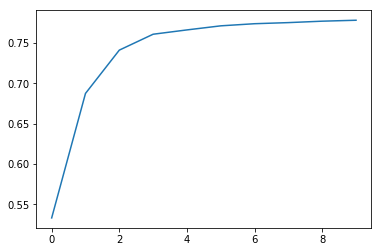

In [250]:
plt.plot([metrics.r2_score(y_valid, np.mean(preds[:i+1], axis=0)) for i in range(10)]);

The shape of this curve suggests that adding more trees isn't going to help us much. Let's check. (Compare this to our original model on a sample)

In [251]:
m = RandomForestRegressor(n_estimators=20, bootstrap=True,n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 7.07 s, sys: 47.5 ms, total: 7.11 s
Wall time: 1.93 s
['Train RMSLE =0.102645', 'Vaild RMSLE=0.347196', 'Train R squared = 0.976776', 'Vaild R squared = 0.784723']


In [253]:
m = RandomForestRegressor(n_estimators=80, bootstrap=True,n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 28.1 s, sys: 137 ms, total: 28.2 s
Wall time: 7.3 s
['Train RMSLE =0.094561', 'Vaild RMSLE=0.343575', 'Train R squared = 0.980290', 'Vaild R squared = 0.789190']


Conclusion adding more tree does not improve the validation R^2. Note: we are working with a small subset of the whole data set. Generally adding more tree helps to a point. Therefore, plot the curve above.

So when Jeremy builds most of his models, he starts with 20 or 30 trees and at the end of the project or at the end of the day’s work, he will use 1000 trees and run it over night.

##### Out-of-bag (OOB) score

Our model above show a training R^2 of 0.98 and a validation R^2 of 0.78

Is our validation set worse than our training set because we're over-fitting, or because the validation set is for a different time period, or a bit of both? With the existing information we've shown, we can't tell. However, random forests have a very clever trick called *out-of-bag (OOB) error* which can handle this (and more!)

The idea is to calculate error on the training set, but only include the trees in the calculation of a row's error where that row was *not* included in training that tree. This allows us to see whether the model is over-fitting, without needing a separate validation set.

This also has the benefit of allowing us to see whether our model generalizes, even if we only have a small amount of data so want to avoid separating some out to create a validation set.

This is as simple as adding one more parameter to our model constructor. We print the OOB error last in our `print_score` function below. 

OOB error can also be used  if your dataset is small and you will not want to pull out a validation set because doing so means you now do not have enough data to build a good model. 

In [265]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1, oob_score=True)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 14.1 s, sys: 105 ms, total: 14.3 s
Wall time: 4.08 s
['Train RMSLE =0.097579', 'Vaild RMSLE=0.353421', 'Train R squared = 0.979012', 'Vaild R squared = 0.776934', 'OOB Score = 0.850573']


The oob score is higher than our validation R^2 but lower than our Train R^2, hence both the time difference and over-fitting are making an impact.  

Note: The accuracy tends to be lower because each row appears in less trees in the OOB samples than it does in the full set of trees. So OOB R² will slightly underestimate how generalizable the model is, but the more trees you add, the less serious that underestimation is.

OOB score will come in handy when setting hyper parameters. There will be quite a few hyper parameters that we are going to set and we would like to find some automated say to set them. One way to do that is to do grid search. Scikit-learn has a function called grid search and you pass in a list of all the hyper parameters you want to tune and all of the values of these hyper parameters you want to try. It will run your model on every possible combination of all these hyper parameters and tell you which one is the best. OOB score is a great choice for getting it to tell you which one is the best.

#### Reducing over-fitting

It turns out that one of the easiest ways to avoid over-fitting is also one of the best ways to speed up analysis: subsampling. Lets return to using our full dataset, so that we can demonstrate the impact of this technique.

#### 2. method - Subsampling - Speeding things up continue

It turns out that one of the easiest ways to avoid over-fitting is also one of the best ways to speed up analysis: subsampling. Let's return to using our full dataset, so that we can demonstrate the impact of this technique.

In [266]:
df_trn, y_trn, nas = proc_df(df_raw, 'SalePrice')
X_train, X_valid = split_vals(df_trn, n_trn)
y_train, y_valid = split_vals(y_trn, n_trn)

The basic idea is this: rather than limit the total amount of data that our model can access, let's instead limit it to a different random subset per tree. That way, given enough trees, the model can still see all the data, but for each individual tree it'll be just as fast as if we had cut down our dataset as before.

Earlier, we took 30,000 rows and created all the models which used a different subset of that 30,000 rows. Why not take a totally different subset of 30,000 each time? In other words, let’s leave the entire 389,125 records as is, and if we want to make things faster, pick a different subset of 20,000 each time. So rather than bootstrapping the entire set of rows, just randomly sample a subset of the data.

In [267]:
set_rf_samples(20000)

`set_rf_samples` is a custom function by fastaiset_rf_samples is a custom function by fastai`.

Scikit-learn does not support this out of box, so `set_rf_samples` is a custom function. So OOB score needs to be turned off when using `set_rf_samples` as they are not compatible. 

`reset_rf_samples()` will turn it back to the way it wasreset_rf_samples() will turn it back to the way it was`.

In [269]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 6min 26s, sys: 3.47 s, total: 6min 30s
Wall time: 2min 2s
['Train RMSLE =0.078197', 'Vaild RMSLE=0.236027', 'Train R squared = 0.987221', 'Vaild R squared = 0.900512', 'OOB Score = 0.908662']


Since each additional tree allows the model to see more data, this approach can make additional trees more useful. Therefore we use the n_estimators parameter to calculate on 100 trees(below). 

In [273]:
preds = np.stack([t.predict(X_valid) for t in m.estimators_])

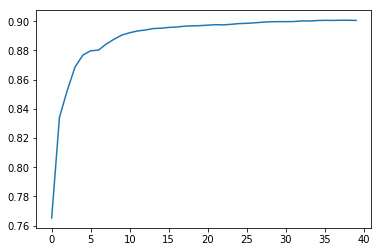

In [274]:
plt.plot([metrics.r2_score(y_valid, np.mean(preds[:i+1], axis=0)) for i in range(preds[:,0].shape[0])]);

In [277]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 6min 35s, sys: 3.46 s, total: 6min 38s
Wall time: 2min 10s
['Train RMSLE =0.078401', 'Vaild RMSLE=0.238215', 'Train R squared = 0.987154', 'Vaild R squared = 0.898659']


The biggest tip: Most people run all of their models on all of the data all of the time using their best possible parameters which is just pointless. If you are trying to find out which feature is important and how they are related to each other, having that 4th decimal place of accuracy is not going to change any of your insights at all. Do most of your models on a large enough sample size that your accuracy is reasonable (within a reasonable distance of the best accuracy you can get) and taking a small number of seconds to train so that you can interactively do your analysis.

We revert to using a full bootstrap sample in order to show the impact of other over-fitting avoidance methods.

In [276]:
reset_rf_samples()

Let’s get a baseline for this full set to compare to:

In [278]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1, oob_score=True)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 6min 29s, sys: 3.62 s, total: 6min 33s
Wall time: 2min 10s
['Train RMSLE =0.078227', 'Vaild RMSLE=0.238566', 'Train R squared = 0.987211', 'Vaild R squared = 0.898360', 'OOB Score = 0.908598']


Define function to display the max depth of the random forest model. 

In [279]:
def dectree_max_depth(tree):
    children_left = tree.children_left
    children_right = tree.children_right

    def walk(node_id):
        if (children_left[node_id] != children_right[node_id]):
            left_max = 1 + walk(children_left[node_id])
            right_max = 1 + walk(children_right[node_id])
            return max(left_max, right_max)
        else: # leaf
            return 1

    root_node_id = 0
    return walk(root_node_id)

In [280]:
t=m.estimators_[0].tree_ 

In [281]:
dectree_max_depth(t)

45

Another way to reduce over-fitting is to grow our trees less deeply. We do this by specifying (with min_samples_leaf) that we require some minimum number of rows in every leaf node. This has two benefits:
There are less decision rules for each leaf node; simpler models should generalize better
The predictions are made by averaging more rows in the leaf node, resulting in less volatility

Stop training the tree further when a leaf node has 5 or less samples (before we were going all the way down to 1). This means there will be one or two less levels of decision being made which means there are half the number of actual decision criteria we have to train (i.e. faster training time).

For each tree, rather than just taking one point, we are taking the average of at least three points that we would expect the each tree to generalize better. But each tree is going to be slightly less powerful on its own.

The numbers that work well are 1, 3, 5, 10, 25, but it is relative to your overall dataset size.

In [282]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=5, n_jobs=-1, oob_score=True)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 5min 24s, sys: 2.58 s, total: 5min 26s
Wall time: 1min 47s
['Train RMSLE =0.140558', 'Vaild RMSLE=0.234482', 'Train R squared = 0.958710', 'Vaild R squared = 0.901810', 'OOB Score = 0.907176']


In [283]:
t=m.estimators_[0].tree_ 

In [284]:
dectree_max_depth(t)

38

In [285]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, n_jobs=-1, oob_score=True)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 5min 40s, sys: 2.57 s, total: 5min 42s
Wall time: 1min 50s
['Train RMSLE =0.114953', 'Vaild RMSLE=0.233649', 'Train R squared = 0.972383', 'Vaild R squared = 0.902506', 'OOB Score = 0.908498']


Here OOB is less but almost the same as the validation set. This is because our validation set is a different time period whereas OOB samples are random. It is much harder to predict a different time period.

We can also increase the amount of variation amongst the trees by not only use a sample of rows for each tree, but to also using a sample of columns for each split. We do this by specifying max_features, which is the proportion of features to randomly select from at each split.
The number of features to consider when looking for the best split:
- If int, then consider max_features features at each split.
- If float, then max_features is a fraction and int(max_features * n_features) features are considered at each split.
- If “auto”, then max_features=n_features.
- If “sqrt”, then max_features=sqrt(n_features).
- If “log2”, then max_features=log2(n_features).
- If None, then max_features=n_features.

In [286]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 3min 5s, sys: 2.11 s, total: 3min 7s
Wall time: 1min 5s
['Train RMSLE =0.119141', 'Vaild RMSLE=0.227813', 'Train R squared = 0.970334', 'Vaild R squared = 0.907316', 'OOB Score = 0.911699']


In [287]:
m = RandomForestRegressor(n_estimators=100, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 7min 39s, sys: 4.61 s, total: 7min 44s
Wall time: 2min 37s
['Train RMSLE =0.117584', 'Vaild RMSLE=0.226713', 'Train R squared = 0.971105', 'Vaild R squared = 0.908209', 'OOB Score = 0.915113']


The RMSLE of 0.226 would get us to the top 20 of this competition — with brainless random forest with some brainless minor hyper parameter tuning. This is why Random Forest is such an important not just first step but often only step of machine learning. It is hard to screw up.


We can't compare our results directly with the Kaggle competition, since it used a different validation set (and we can no longer to submit to this competition) - but we can at least see that we're getting similar results to the winners based on the dataset we have.
The sklearn docs show an example of different max_features methods with increasing numbers of trees - as you see, using a subset of features on each split requires using more trees, but results in better models:

![sklearn max_features chart](http://scikit-learn.org/stable/_images/sphx_glr_plot_ensemble_oob_001.png)

## End of lesson 2